In [1]:
from mylib.statistic_test import *

code_id = '0007 - Cell Number'
loc = os.path.join(figpath, code_id)
mkdir(loc)

idx = np.where((f1['Stage'] != 'PRE')&(np.isin(f1['MiceID'], [10209, 10212, 10224, 10227, 10232, 10234])))[0]
if os.path.exists(os.path.join(figdata, code_id+' .pkl')) == False:
    NROI = {
        "MiceID": [],
        "Training Day": [],
        "Stage": [],
        "Cell Number": [],
        "Maze Type": []
    }
    maze_type = ['Open Field', 'Maze A', 'Maze B']
    for i in tqdm(idx):
        try:
            with open(f1['Trace File'][i], 'rb') as handle:
                trace = pickle.load(handle)
        except:
            continue
            
        NROI['MiceID'].append(int(f1['MiceID'][i]))
        NROI['Training Day'].append(f1['training_day'][i])
        NROI['Stage'].append(f1['Stage'][i])
        NROI['Cell Number'].append(trace['n_neuron'])
        NROI['Maze Type'].append(maze_type[int(f1['maze_type'][i])])
        
        del trace
        
    for key in NROI.keys():
        NROI[key] = np.array(NROI[key])
        
    with open(os.path.join(figdata, code_id+'.pkl'), 'wb') as handle:
        pickle.dump(NROI, handle)
        
    NROID = pd.DataFrame(NROI)
    NROID.to_excel(os.path.join(figdata, code_id+'.xlsx'), index=False)
    print(len(NROID))
else:
    with open(os.path.join(figdata, code_id+'.pkl'), 'rb') as handle:
        NROI = pickle.load(handle)

        E:\Data\FinalResults\0007 - Cell Number is already existed!


100%|██████████| 546/546 [09:24<00:00,  1.03s/it]

543


Unique X: ['Stage 1 Day 1' 'Stage 1 Day 10' 'Stage 1 Day 11' 'Stage 1 Day 12'
 'Stage 1 Day 13' 'Stage 1 Day 2' 'Stage 1 Day 3' 'Stage 1 Day 4'
 'Stage 1 Day 5' 'Stage 1 Day 6' 'Stage 1 Day 7' 'Stage 1 Day 8'
 'Stage 1 Day 9' 'Stage 2 Day 1' 'Stage 2 Day 10' 'Stage 2 Day 11'
 'Stage 2 Day 12' 'Stage 2 Day 13' 'Stage 2 Day 2' 'Stage 2 Day 3'
 'Stage 2 Day 4' 'Stage 2 Day 5' 'Stage 2 Day 6' 'Stage 2 Day 7'
 'Stage 2 Day 8' 'Stage 2 Day 9']
Open Field: 491.65 ± 161.30,  One-way ANOVA: 0.9999062230900899
Maze 1:     437.78 ± 149.78,  One-way ANOVA: 0.9999998643320068
Maze 2:     437.71 ± 136.25,  One-way ANOVA: 0.9968805071576338


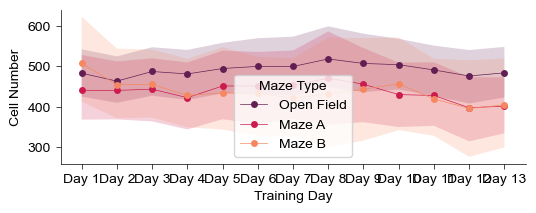

In [ ]:
NROI['X'] = np.array([f"{NROI['Stage'][i]} {NROI['Training Day'][i]}" for i in range(len(NROI['Cell Number']))])
x_uniq = np.unique(NROI['X'])
print(f"Unique X: {x_uniq}")
fig = plt.figure(figsize=(6, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.lineplot(
    x = 'Training Day',
    y = 'Cell Number',
    hue = 'Maze Type',
    data = NROI,
    palette = MazePalette,
    hue_order=['Open Field', 'Maze A', 'Maze B'],
    ax=ax,
    linewidth=0.5,
    err_kws={'edgecolor': None},
    #err_style='bars',
    #err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
    marker='o', # Marker. It can be erased if not needed.
    markersize=5,
    markeredgewidth=0
)
value_op = [NROI['Cell Number'][np.where((NROI['X'] == x)&(NROI['Maze Type'] == 'Open Field'))[0]] for x in x_uniq]
value_m1 = [NROI['Cell Number'][np.where((NROI['X'] == x)&(NROI['Maze Type'] == 'Maze A'))[0]] for x in x_uniq]
value_m2 = [NROI['Cell Number'][np.where((NROI['X'] == x)&(NROI['Maze Type'] == 'Maze B'))[0]] for x in x_uniq[13:]]
print(f"Open Field: {np.mean(np.vstack(value_op)):.2f} ± {np.std(np.vstack(value_op)):.2f},  One-way ANOVA: {f_oneway(*value_op).pvalue}")
print(f"Maze 1:     {np.mean(np.vstack(value_m1)):.2f} ± {np.std(np.vstack(value_m1)):.2f},  One-way ANOVA: {f_oneway(*value_m1).pvalue}")
print(f"Maze 2:     {np.mean(np.vstack(value_m2)):.2f} ± {np.std(np.vstack(value_m2)):.2f},  One-way ANOVA: {f_oneway(*value_m2).pvalue}")
plt.savefig(os.path.join(loc, 'Number of ROI.png'), dpi=600)
plt.savefig(os.path.join(loc, 'Number of ROI.svg'), dpi=600)
plt.show()

In [12]:
# Calculate the averaged number of ROIs for each maze type
for maze_type in ['Open Field', 'Maze A', 'Maze B']:
    maze_data = NROI['Cell Number'][NROI['Maze Type'] == maze_type]
    mean_roi = np.mean(maze_data)
    std_roi = np.std(maze_data)
    print(f"{maze_type}: Mean = {mean_roi:.2f}, Std = {std_roi:.2f}")

Open Field: Mean = 491.65, Std = 161.30
Maze A: Mean = 437.78, Std = 149.78
Maze B: Mean = 437.71, Std = 136.25
